[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JamesFergusson/Introduction-to-Research-Computing/blob/master/03_PythonModules.ipynb)

# Modules

Ok, so now we have a basic understanding of Python and how to write codes that perform simple calculations.  One key part is that we can write functions for sections of code we want to use multiple times.  This also helps us to keep our main code simple to understand by keeping it short as detailed calculating can be moved to functions instead.  Take the example of calculating the integral of three legendre functions up to some $l_{max}$

$\int_{-1}^1 P_{l_1}(\mu) P_{l_2}(\mu) P_{l_3}(\mu) d\mu$

Here is some (quite bad) code to do this:

In [1]:
lmax = 2

lmax += 1
lvec = [l for l in range(lmax)]
xmax = lmax*10
xvec = [(2e0*x/(xmax-1))-1 for x in range(xmax)]

legendre = []
for x in xvec:
    pt = [1,x]
    for i in lvec[2:]:
        y = ((2*i-1)/(i))*pt[i-1]*x - ((i-1)/i)*pt[i-2]
        pt.append(y)
    legendre.append(pt)

for l1 in lvec:
    for l2 in lvec[l1:]:
        for l3 in lvec[l2:]:
            y1 = legendre[0][l1]*legendre[0][l2]*legendre[0][l3]
            x1 = xvec[0]
            int = 0e0
            for i, x in enumerate(xvec[1:]):
                y2 = legendre[i][l1]*legendre[i][l2]*legendre[i][l3]
                x2 = x
                int += 0.5*(y2+y1)*(x2-x1)
                y1 = y2
                x1 = x2
            print(l1,l2,l3,int)

0 0 0 2.0
0 0 1 -0.13555291319857335
0 0 2 0.009266472590102048
0 1 1 0.6728443150600679
0 1 2 -0.12913962060340942
0 2 2 0.4171535197760008
1 1 1 -0.13127738480179732
1 1 2 0.28119117071403454
1 2 2 -0.12400746136851618
2 2 2 0.13821157249435442


Now we can add some functions to simplify it:

In [ ]:
def create_vectors(lmax):
    lmax += 1
    lvec = [l for l in range(lmax)]
    xmax = lmax*10
    xvec = [(2e0*x/(xmax-1))-1 for x in range(xmax)]
    return xvec, lvec

def create_legendre(xvec,lvec):
    legendre = []
    for x in xvec:
        pt = [1,x]
        for i in lvec[2:]:
            y = ((2*i-1)/(i))*pt[i-1]*x - ((i-1)/i)*pt[i-2]
            pt.append(y)
        legendre.append(pt)
    return legendre

def integrate(l1,l2,l3,xvec,legendre):
    y1 = legendre[0][l1]*legendre[0][l2]*legendre[0][l3]
    x1 = xvec[0]
    int = 0e0
    for i, x in enumerate(xvec[1:]):
        y2 = legendre[i][l1]*legendre[i][l2]*legendre[i][l3]
        x2 = x
        int += 0.5*(y2+y1)*(x2-x1)
        y1 = y2
        x1 = x2
    return int
    
# ************** Main code **************
lmax = 2

xvec, lvec = create_vectors(lmax)

L = create_legendre(xvec,lvec)

for l1 in lvec:
    for l2 in lvec[l1:]:
        for l3 in lvec[l2:]:
            int = integrate(l1,l2,l3,xvec,L)
            print(l1,l2,l3,int)
            


This is easier to understand but the long lists of functions at the start make it harder to see what is happening (and find the 'main' part).

As we start to write more and more complicated codes we will soon find that then number of functions we create becomes too much to keep in the main python file and still be easily readable.  The way to deal with this is to move the functions into modules.  A module is just a .py file which contains the functions.  Create a file called leg_tools.py in the Tools directory and copy the functions into it.  Now we can run:

In [ ]:
import sys
sys.path.append('./Tools/') #We will look at this later, it just makes sure the interpreter can find the file

import leg_tools as lg

lmax = 2

xvec, lvec = lg.create_vectors(lmax)

L = lg.create_legendre(xvec,lvec)

for l1 in lvec:
    for l2 in lvec[l1:]:
        for l3 in lvec[l2:]:
            int = lg.integrate(l1,l2,l3,xvec,L)
            print(l1,l2,l3,int)

This is known as modular programming.  It makes the code easier to read, more resuable and easier to debug as you can test the modules seperatly.  Once you start writing alot of code you may want to begin creating packages, which are just sets of modules.   This is very easy.  You just put all the modules files in a directory then create an empty file called `__init__.py` in the directory (this file can contain initilisation code for the package but blank is fine).  Try this with out `Tools` directory then try this:

In [ ]:
from Tools import leg_tools as lg

lmax = 2

xvec, lvec = lg.create_vectors(lmax)

L = lg.create_legendre(xvec,lvec)

for l1 in lvec:
    for l2 in lvec[l1:]:
        for l3 in lvec[l2:]:
            int = lg.integrate(l1,l2,l3,xvec,L)
            print(l1,l2,l3,int)

So now we have some lovely readable code in a nice modular structure.  The `import` command has the following possible structures:

In [ ]:
import math         # now we can use, for example, sin with                        >> math.sin(x)
import math as mt   # 'math' takes too long to type, now we only need              >> mt.sin(x)
from math import sin  # I'm very busy and important, I don't have time for 'mt.'   >> sin(x)
from math import *  # That was great, I'll do it with everything in math!          >> sin(x)

The first two are both equivalent but the second needs less typing. The third points sin to math.sin which is ok but the second is better. The last should never be used.  This is because there can be clashes with function names in different modules so if you put everything in the namespace you can get unexpected behaviour, for example python has a function `sum` but so does `numpy` and they take different arguments.  `tab` completion makes typing long things easy anyway so it's unessecary.  Please stick to the second and use sensible aliases

It is worth noting that while we have only been looking at python the basic structure of most programming languages is roughly the same.  They all have a set of data types (`int`, `float`, `string` and sometimes `complex`) and have an `if`, `for` and `while` structures and often a compressed version of each (like we saw in list comprehensions).  They also always support `functions` and `subroutines` in a modular structure where we move often used blocks of code into seperate files then import them to the main programme.  Here is a quick comparison to illustate the point:

In [ ]:
#***  Python  ***                       ***    C    ***                       *** Fortran ***
#******************************************************************************************************************
#  Basic types:
#****************************************************************************************************************** 
# a = 1                                  int a = 1;                            INTEGER :: a = 1
# x = 1.0                                double x = 1.0;                       REAL(DP) :: x = 1.0
# s = 'cat'                              char s[180] = "cat";                  CHARACTER(len=180) :: s = "cat"

#******************************************************************************************************************
#  For loops:
#******************************************************************************************************************
# for n in range(10):                    for(i=0;i<10;i++){                    DO n=0,9
#     'do something'                         'do something';                      'do something'
#                                        }                                     END DO

#******************************************************************************************************************
#  Conditionals:
#******************************************************************************************************************
# if n<10:                               if(n<10){                             IF (n<10) THEN
#     'stuff1'                               'stuff1';                             'stuff1'
# elif n<20:                             } else if (n<20) {                    ELSE IF (n<20)
#     'stuff2'                               'stuff2';                             'stuff2'      
# else:                                  } else {                              ELSE
#     'stuff3'                               'stuff3';                             'stuff3'  
#                                        }                                     END IF

#******************************************************************************************************************
# Function in module file:
#******************************************************************************************************************
# def function1(i,x)                     #include <math.h>                     MODULE module1
#    return x**i                         double function1(int i, double x){        SUBROUTINE function1(i,x,y) 
#                                            return pow(x,i);                          INTEGER :: i
#                                        }                                             REAL(DP) :: x,y
#                                                                                      y = x**i
#                                                                                  END SUBROUTINE
#                                                                              END MODULE

#******************************************************************************************************************
# Using function from module file:
#******************************************************************************************************************
# import module1 as mod1                #include "module1"                     PROGRAM MAIN
# x = mod1.function1(2.0,3)             int main( int argc, char *argv[] ){        USE module1
# print(x)                                  double x = function1(2.0,3);           REAL(DP) :: x
#                                           printf("%e\n",x);                      CALL function1(2.0,3,x)
#                                       }                                          WRITE(*,*) x
#                                                                              END

From this we can see clear similarities between the languages.  The key differences between python and  C and Fortran are that you have to declare what each of your variables are, they are both much more explicit in their structure and they both need to be 'compiled' to work


The other main difference is that native python generally runs, depending on the task, 100x to 1000x slower than the equivalent compiled code in C or Fortran.  This is the trade off for having flexable types and simple syntax.  The interpreter has to spend alot of time checking exactly what it needs to do to run the code.  In compiled languages you have to be very explicit about what you are doing so the computer can just get on with the calculation and the code runs faster.  Also they are compiled, which means run though a programme to produce an executable (thing you can run, or execute), and during this process the compiler will optimise the code for the particular chipset you are using.  

This seems pretty terrible at first, why would you want to bother leaning a language that performs so badly?  Well the answer is that you can keep all the convenience of python but have comparable speeds by using optimised modules or packages to perform the heavy lifting.  For instance simply deciding to use the numerical package `numpy` (which we will meet in a second) can reduce runtimes by ~100x.  This is because almost all the python packages we use are actually written in C and Fortran (you can check this with the `??` command. This will return the python code for the function if possible.  If it returns just the documentation, like `?`, then the function is written in another language).  You can then think of python as a simple way of accessing the performance of compiled code without the hassel of having to write it.  It also gives us the first rule for writing code which is simply:

<b> Bad artists copy, Great artists steal</b>

Most numerical libraries will have been written by a team of experts and carefully tested and optimised. They will write much better code than you can so always use theirs for standard operations if possible. (but beware this isn't always true so be careful)

Right, with that in mind let's look at the most useful modules for python

## Standard Library

Python3 has a standard library of modules you can import (see: https://docs.python.org/3/library/). These cover most of the basic stuff you could want to.  Some useful ones are: `sys`, `itertools`,`random`, `math/cmath`. We already used `sys.path` to add our module directory to the path so python could find it near the beginning of this notebook.  This is probably the most useful function in it, the rest are pretty obscure.

`itertools` is more fun.  It has lots of interesting iterators you can play with like `count`, `permutations`, `combinations` and `product`.  There names are pretty self explanitory but here are some examples of them in action:

In [4]:
from itertools import count
from itertools import permutations
from itertools import combinations
from itertools import product

for i in count():
    if i>10:
        break
    print(i)

perm = permutations([1,2,3])
comb = combinations([1,2,3,4,5],2) 
prod = product([1,2,3],[2,3,4])

print(*perm)
print(*comb)
print(*prod)

0
1
2
3
4
5
6
7
8
9
10
(1, 2, 3) (1, 3, 2) (2, 1, 3) (2, 3, 1) (3, 1, 2) (3, 2, 1)
(1, 2) (1, 3) (1, 4) (1, 5) (2, 3) (2, 4) (2, 5) (3, 4) (3, 5) (4, 5)
(1, 2) (1, 3) (1, 4) (2, 2) (2, 3) (2, 4) (3, 2) (3, 3) (3, 4)


`random` gives you random number generators. `math` contains most standard mathematical functions (see:https://docs.python.org/3/library/math.html) which are good for single values, `cmath` is the same for complex numbers.  If you want to use them on all elements in a large array `numpy` is much better.

## Numpy

Numpy (<b>Num</b>erical <b>py</b>thon) is primarily for creating and performing calculations on arrays and as such is fundamental to most data science applications (python does have an `array` module as standard but numpy is better).  It is almost always imported as `np`.

### Creation
Let's begin by creating arrays which are just $N$ dimensional objects of a single type. The 'single type' constraint is worth remembering.  Trying to put floats into integer arrays, or complex numbers to either will round rather than upcast like with single variables.

There are alot of ways to do this:

In [5]:
import numpy as np
a = np.array([1,2,3,4,5])                    # From a list
b = np.array([[1,2],[3,4]])                  # From a list of a list
c = np.array([range(i,i+3) for i in [1,2,3]])# From a list comprehension
z = np.zeros((3,4), dtype='int')             # 3x4 array of integer zeros
o1 = np.ones((3,4), dtype='float')            # 3x4 array of float ones
o2 = np.ones_like(z)                          # z shaped array of ones.  see also zeros_like
p = np.full((3,4), 3.14)                     # 3x4 array of 3.14
m = np.arange(1,100,23)                      # Like range count from 1 in multiples of 23 until 100
n = np.linspace(0,2,7)                       # 7 values linearly spaced from 0 to 2
i = np.eye(4)                                # 4x4 Identity

#*** Random arrays ***
r1 = np.random.random((3,4))                 # 3x4 Random numbers between 0-1
r2 = np.random.normal(0,5,(3,4))             # 3x4 Random numbers normal distributed with mean 0 and stdev 5
r3 = np.random.randint(3,9,(3,4))            # 3x4 Random integrers between 3-9

#*** Blank arrays ***
k = np.empty((3,4))                          # 3x4 array with unallocated entries (just the memory reserved)
l = np.empty_like(b)                         # Empty array with dimensions same as 'b'

print(a)
print(b)
print(c)
print(z)
print(o1)
print(o2)
print(p)
print(m)
print(n)
print(i)
print(r1)
print(r2)
print(r3)
print(k)

[1 2 3 4 5]
[[1 2]
 [3 4]]
[[1 2 3]
 [2 3 4]
 [3 4 5]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14]]
[ 1 24 47 70 93]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.        ]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0.6071888  0.10537586 0.91164759 0.05280159]
 [0.62455521 0.32606485 0.40011031 0.78967104]
 [0.21920314 0.21606779 0.63642052 0.97342483]]
[[ 7.43368834 -6.97127242  5.33074948 -3.77372027]
 [-2.40402306  6.19229163  6.4213246  -5.38329112]
 [-3.01442892  0.87591045 -1.87678286  4.51344364]]
[[4 4 7 3]
 [7 4 3 8]
 [8 3 3 8]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


To delete an array after you have finished with it simply use:

In [6]:
a = None
print(a)

None


But beware the array won't go anywhere if you still have variables that point to it.

In [7]:
c=b
print(b,c)
b=None
print(b,c)

[[1 2]
 [3 4]] [[1 2]
 [3 4]]
None [[1 2]
 [3 4]]


This command doesn't actually delete the array but just unreferences it.  The python garbage collector should then come along and clean it up so don't expect the memory use to come down immediately.  Try to get into the habit of doing this with all arrays after you finish with them,  this stops 'memory leaks' which can slow down your code.

### Accessing elements
Once you have created an array you access the elements in the obvious way

In [8]:
M = np.array([range(i,i+5) for i in [1,6,11,16,21]])
print(M,'\n')
print(M[1,1],M[1,3],M[-1,-1],M[-1,2],'\n')   # Accessing individual elements
M[2,2] = 100                                 # Changing elements
print(M,'\n')             
M[2,2] = 3.1415927                           # Beware! numpy won't up-cast an array, it will down-cast your input
print(M,'\n')

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]] 

7 9 25 23 

[[  1   2   3   4   5]
 [  6   7   8   9  10]
 [ 11  12 100  14  15]
 [ 16  17  18  19  20]
 [ 21  22  23  24  25]] 

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12  3 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]] 



We can of course access subarrays easily using the colon notation we met earlier in lists

In [9]:
print(M[1:3,1:3],'\n')  # central sub array
print(M[:3,2:],'\n')    # top right sub array
print(M[:,0:5:2],'\n')  # only even columns
print(M[::-1,:],'\n')   # reverse the rows (you can neglect the `,:` after `::-1` here but please don't)

[[ 7  8]
 [12  3]] 

[[ 3  4  5]
 [ 8  9 10]
 [ 3 14 15]] 

[[ 1  3  5]
 [ 6  8 10]
 [11  3 15]
 [16 18 20]
 [21 23 25]] 

[[21 22 23 24 25]
 [16 17 18 19 20]
 [11 12  3 14 15]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]] 



Note:  Assigining this to something does not create a new array with the sub-array, it just maps that part of the array to a new object so editing an entry affects both arrays:

In [10]:
M = np.array([[range(i,i+5) for i in range(j,j+25,5)] for j in range(1,125,25)] )
print(M,'\n*****************')
N = M[1:4,1:4,1:4]
print(N,'\n*****************')
N[1,1,1] = 1000
print(N,'\n*****************')
print(M,'\n*****************')

[[[  1   2   3   4   5]
  [  6   7   8   9  10]
  [ 11  12  13  14  15]
  [ 16  17  18  19  20]
  [ 21  22  23  24  25]]

 [[ 26  27  28  29  30]
  [ 31  32  33  34  35]
  [ 36  37  38  39  40]
  [ 41  42  43  44  45]
  [ 46  47  48  49  50]]

 [[ 51  52  53  54  55]
  [ 56  57  58  59  60]
  [ 61  62  63  64  65]
  [ 66  67  68  69  70]
  [ 71  72  73  74  75]]

 [[ 76  77  78  79  80]
  [ 81  82  83  84  85]
  [ 86  87  88  89  90]
  [ 91  92  93  94  95]
  [ 96  97  98  99 100]]

 [[101 102 103 104 105]
  [106 107 108 109 110]
  [111 112 113 114 115]
  [116 117 118 119 120]
  [121 122 123 124 125]]] 
*****************
[[[32 33 34]
  [37 38 39]
  [42 43 44]]

 [[57 58 59]
  [62 63 64]
  [67 68 69]]

 [[82 83 84]
  [87 88 89]
  [92 93 94]]] 
*****************
[[[  32   33   34]
  [  37   38   39]
  [  42   43   44]]

 [[  57   58   59]
  [  62 1000   64]
  [  67   68   69]]

 [[  82   83   84]
  [  87   88   89]
  [  92   93   94]]] 
*****************
[[[   1    2    3    4    5]
  [ 

To actualy copy the sub array we must use `.copy()`, ie:

In [11]:
M = np.array([[range(i,i+5) for i in range(j,j+25,5)] for j in range(1,125,25)] )
N = M[1:4,1:4,1:4].copy()

Our code to create the original array `M` in the above example looks a bit complicated for a matrix with a fairly simple pattern.  Matricies like these can be more easily generated by taking a vector and using the `reshape` command ie:

In [12]:
M = np.arange(1,126).reshape((5,5,5))
print(M)

[[[  1   2   3   4   5]
  [  6   7   8   9  10]
  [ 11  12  13  14  15]
  [ 16  17  18  19  20]
  [ 21  22  23  24  25]]

 [[ 26  27  28  29  30]
  [ 31  32  33  34  35]
  [ 36  37  38  39  40]
  [ 41  42  43  44  45]
  [ 46  47  48  49  50]]

 [[ 51  52  53  54  55]
  [ 56  57  58  59  60]
  [ 61  62  63  64  65]
  [ 66  67  68  69  70]
  [ 71  72  73  74  75]]

 [[ 76  77  78  79  80]
  [ 81  82  83  84  85]
  [ 86  87  88  89  90]
  [ 91  92  93  94  95]
  [ 96  97  98  99 100]]

 [[101 102 103 104 105]
  [106 107 108 109 110]
  [111 112 113 114 115]
  [116 117 118 119 120]
  [121 122 123 124 125]]]


More usefully this is good for converting n-dim 1D arrays to nx1-dim 2D arrays

In [13]:
M = np.arange(10)
print(M)
N = M.reshape(1,10)
print(N)
N = M.reshape(10,1)
print(N)

[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4 5 6 7 8 9]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


### Joining and spliting arrays
You can also join and split arrays.  To join them you use `concatenate`

In [14]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print(np.concatenate([A,B]))
A = A.reshape(1,3)
B = B.reshape(1,3)
print(np.concatenate([A,B]))
print(np.concatenate([A,B],axis=1))


[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[1 2 3 4 5 6]]


For joining arrays with different dimensions (ie adding a row to a matrix) there are three special commands

In [15]:
A = np.array([[1,2,3,4],[5,6,7,8]])
v1 = np.array([9,10,11,12])
v2 = np.array([[13,14,15]])
v3 = np.random.randint(0,20,(3,5))
print(A)
A = np.vstack([A,v1])   # Vertical stack, a bit like .append for lists
print(A)
A = np.hstack([A,v2.T]) # Horizontal stack (.T does the transpose)
print(A)
A = np.dstack([A,v3])   # Depth stack
print(A)

[[1 2 3 4]
 [5 6 7 8]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4 13]
 [ 5  6  7  8 14]
 [ 9 10 11 12 15]]
[[[ 1 14]
  [ 2 11]
  [ 3  7]
  [ 4  7]
  [13  4]]

 [[ 5 16]
  [ 6  8]
  [ 7  1]
  [ 8  9]
  [14  6]]

 [[ 9 19]
  [10  9]
  [11  9]
  [12 19]
  [15  1]]]


Splitting arrays works in the same way using `split`.   Here `split(A,2)` splits the matrix into two equal halves and `split(A,[2])` splits the matrix at row 2.  `split[A,[2],axis=1]` splits the matrix on column 2:

In [16]:
A = np.arange(20).reshape(4,5)
print(A)
B,C = np.split(A,2)
print(B)
print(C)
B,C = np.split(A,[2],axis=1)
print(B)
print(C)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[10 11 12 13 14]
 [15 16 17 18 19]]
[[ 0  1]
 [ 5  6]
 [10 11]
 [15 16]]
[[ 2  3  4]
 [ 7  8  9]
 [12 13 14]
 [17 18 19]]


And again we have `vsplit`,`hsplit` and `dsplit` variants:

In [17]:
A = np.arange(20).reshape(4,5)
print(A)
B,C = np.vsplit(A,2)
print(B)
print(C)
B,C = np.hsplit(A,[2])
print(B)
print(C)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[10 11 12 13 14]
 [15 16 17 18 19]]
[[ 0  1]
 [ 5  6]
 [10 11]
 [15 16]]
[[ 2  3  4]
 [ 7  8  9]
 [12 13 14]
 [17 18 19]]


### Elementwise Calculation
Numpy has a very large number of elementwise operators for arrays.  Firstly, it understands all the standard math operators for numbers in python:

In [18]:
A = np.linspace(1,2,9).reshape(3,3)
B = np.linspace(-2,-1,9).reshape(3,3)
print(A+B)
print(A-B)
print(A*B)
print(A/B)
print(A//B)
print(A**B)
print(A%B)

[[-1.   -0.75 -0.5 ]
 [-0.25  0.    0.25]
 [ 0.5   0.75  1.  ]]
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]
[[-2.       -2.109375 -2.1875  ]
 [-2.234375 -2.25     -2.234375]
 [-2.1875   -2.109375 -2.      ]]
[[-0.5        -0.6        -0.71428571]
 [-0.84615385 -1.         -1.18181818]
 [-1.4        -1.66666667 -2.        ]]
[[-1. -1. -1.]
 [-1. -1. -2.]
 [-2. -2. -2.]]
[[1.         0.80184241 0.67671761]
 [0.59601627 0.54433105 0.51295188]
 [0.49682385 0.49303025 0.5       ]]
[[-1.    -0.75  -0.5  ]
 [-0.25  -0.    -1.125]
 [-0.75  -0.375 -0.   ]]


There are also a large array of functions that can be applied elementwise (check here for a list https://docs.scipy.org/doc/numpy/reference/ufuncs.html):

In [19]:
A = np.linspace(-1,0.1,5)
print(abs(A))
print(np.sin(A))
print(np.arccos(A))
print(np.exp(A))
print(np.log(abs(A)))
print(np.reciprocal(A))

[1.    0.725 0.45  0.175 0.1  ]
[-0.84147098 -0.66313544 -0.43496553 -0.17410814  0.09983342]
[3.14159265 2.38183072 2.03756167 1.74670209 1.47062891]
[0.36787944 0.48432457 0.63762815 0.83945702 1.10517092]
[ 0.         -0.32158362 -0.7985077  -1.74296931 -2.30258509]
[-1.         -1.37931034 -2.22222222 -5.71428571 10.        ]


Note:  There are two useful ones, `np.expm1` and `log1p` which calculate $e^x-1$ and $\ln(x+1)$ which could otherwise be numerically unstable for small input.

For more information<b> you can search numpy documentation! </b> With so many functions and commands it can be hard to use `tab` completion to find the one you want.  Here you can use the function `np.lookfor()` which searches all the documentation for whatever string you enter:

In [20]:
np.lookfor('dates')

Search results for 'dates'
--------------------------
numpy.is_busday
    Calculates which of the given dates are valid days, and which are not.
numpy.busday_count
    Counts the number of valid days between `begindates` and
numpy.busday_offset
    First adjusts the date to fall on a valid day according to
numpy.ndindex.__next__
    Standard iterator method, updates the index and returns the index
numpy.core._multiarray_umath.is_busday
    Calculates which of the given dates are valid days, and which are not.
numpy.core._multiarray_umath.busday_count
    Counts the number of valid days between `begindates` and
numpy.core._multiarray_umath.busday_offset
    First adjusts the date to fall on a valid day according to
numpy.loadtxt
    Load data from a text file.
numpy.busdaycalendar
    A business day calendar object that efficiently stores information
numpy.random.RandomState
    Container for the slow Mersenne Twister pseudo-random number generator.
numpy.distutils.system_info.Numeric_i

### Linear Algebra
The bread and butter of alot of numerical work is linear algebra.  Numpy has all the basic commands you would expect:

In [21]:
A = np.array([[5,1,2],[2,5,1],[1,2,6]])
B = np.linspace(6,12,6).reshape(3,2)
print('dot product\n',np.dot(A,B))
print('Matrix product\n',np.matmul(A,B))
print('Inner product\n',np.inner(A,A))
print('Outer product\n',np.outer(A,B))
print('Trace\n',np.trace(A))
print('Transpose\n',A.T)
print('Matrix Power\n',np.linalg.matrix_power(A,2))
print('Inverse\n',np.linalg.inv(A))
print('Singular Value Decomposition\n',np.linalg.svd(A))
print('Determinant\n',np.linalg.det(A))
print('Eigen decomposition\n',np.linalg.eig(A))

dot product
 [[60.  69.6]
 [64.8 74.4]
 [87.6 98.4]]
Matrix product
 [[60.  69.6]
 [64.8 74.4]
 [87.6 98.4]]
Inner product
 [[30 17 19]
 [17 30 18]
 [19 18 41]]
Outer product
 [[30.  36.  42.  48.  54.  60. ]
 [ 6.   7.2  8.4  9.6 10.8 12. ]
 [12.  14.4 16.8 19.2 21.6 24. ]
 [12.  14.4 16.8 19.2 21.6 24. ]
 [30.  36.  42.  48.  54.  60. ]
 [ 6.   7.2  8.4  9.6 10.8 12. ]
 [ 6.   7.2  8.4  9.6 10.8 12. ]
 [12.  14.4 16.8 19.2 21.6 24. ]
 [36.  43.2 50.4 57.6 64.8 72. ]]
Trace
 16
Transpose
 [[5 2 1]
 [1 5 2]
 [2 1 6]]
Matrix Power
 [[29 14 23]
 [21 29 15]
 [15 23 40]]
Inverse
 [[ 0.22047244 -0.01574803 -0.07086614]
 [-0.08661417  0.22047244 -0.00787402]
 [-0.00787402 -0.07086614  0.18110236]]
Singular Value Decomposition
 (array([[-0.53346003,  0.38985456,  0.75062229],
       [-0.52185083,  0.5467033 , -0.65481846],
       [-0.66565164, -0.74103234, -0.08819843]]), array([8.38679032, 4.21004787, 3.59683819]), array([[-0.52185083, -0.53346003, -0.66565164],
       [ 0.5467033 ,  0.38985

The difference between `dot` and `matmul` is only for arrays with dimension $N>2$. `np.dot(A,B)` is a sum product over the last axis of A and the second-to-last of B and `matmul(A,B)` is treated as a stack of matrices residing in the last two indexes and broadcast accordingly.  There is also the more general `tensordot` and `einsum` for more general products.

It can also solve linear equations for you:

In [22]:
A = np.linspace(1,6,9).reshape(3,3)
b = np.linspace(2,5,3)
print(np.linalg.solve(A,b))           # Straight linear solve 
C = np.linspace(1,4,12).reshape(3,4)
d = np.linspace(2,4,3)
print(np.linalg.lstsq(C,d,rcond=-1))  # Least squares solve for under or over determined systems

[  5.88 -12.08   7.  ]
(array([-0.55      , -0.03055556,  0.48888889,  1.00833333]), array([], dtype=float64), 2, array([9.24727769e+00, 3.52447029e-01, 5.45781243e-16]))


Numpy also has aggregator functions which are good for statistics of the arrays. They can be applied to the whole array or just along particular dimensions with the `axis` argument.  Here are some examples:

In [23]:
A = np.linspace(0,1,16).reshape(4,4)
print('sum:          ',np.sum(A))
print('product:      ',np.prod(A))
print('mean:         ',np.mean(A))
print('sdt dev:      ',np.std(A))
print('variance:     ',np.var(A))
print('minimum:      ',np.min(A))
print('maximum:      ',np.max(A))
print('median:       ',np.median(A))
print('index of min: ',np.argmin(A))
print('index of max: ',np.argmax(A))

sum:           8.0
product:       0.0
mean:          0.5
sdt dev:       0.3073181485764296
variance:      0.09444444444444444
minimum:       0.0
maximum:       1.0
median:        0.5
index of min:  0
index of max:  15


Note that annoyingly the `argmin` and `argmax` only return the flattened indexes not coordinates.  To fix this you can do:

In [24]:
A = np.linspace(0,1,16).reshape(4,4)
print('index of min: ',np.unravel_index(np.argmin(A), A.shape))
print('index of max: ',np.unravel_index(np.argmax(A), A.shape))

index of min:  (0, 0)
index of max:  (3, 3)


The main point to take from this section is that when dealing with arrays you should <b> never </b> loop over them unless it is completely unavoidable.  Python loops are notoriously slow so you are always better to use compiled routines from a package if possible.

### Broadcasting
Numpy had one further trick with arrays called broadcasting which allows you to perfom binary operations on matricies of different dimensions (dimension of size 1 don't count).  The rules for broadcasting are roughly that the lower dimensional array is copied until the dimensions agree. This sounds tricky but the process is easy to understand by example.

In [25]:
A = np.ones((4,4))
B = np.arange(4).reshape(1,4)
C = np.ones((2,4,4))
print('Add scalar to matrix\n',A+5)
print('Add vector to matrix\n',A+B)
print('Add vector to 3D arr\n',B+C)
print('Add vector to column\n',B+B.T)

Add scalar to matrix
 [[6. 6. 6. 6.]
 [6. 6. 6. 6.]
 [6. 6. 6. 6.]
 [6. 6. 6. 6.]]
Add vector to matrix
 [[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]
Add vector to 3D arr
 [[[1. 2. 3. 4.]
  [1. 2. 3. 4.]
  [1. 2. 3. 4.]
  [1. 2. 3. 4.]]

 [[1. 2. 3. 4.]
  [1. 2. 3. 4.]
  [1. 2. 3. 4.]
  [1. 2. 3. 4.]]]
Add vector to column
 [[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


This initially doesn't sound very useful but it can be quite helpful.  Here are two examples

1. Subtracting the mean

Suppose we have made 10 measuements for 3 variables and we want to remove the bias from each one.  We know their average should be zero so we can just subtract of the mean as a first approximation.  We can represent the data as a 3x10 array and the bias as a 3 vector.  With broadcasting we can do the following:

In [26]:
D = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6],[5,6,7],[6,7,8],[7,8,9],[9,0,1],[0,1,2],[1,2,3]])
V = D.mean(0)
D = D-V
print(D)

[[-2.8 -1.8 -1.8]
 [-1.8 -0.8 -0.8]
 [-0.8  0.2  0.2]
 [ 0.2  1.2  1.2]
 [ 1.2  2.2  2.2]
 [ 2.2  3.2  3.2]
 [ 3.2  4.2  4.2]
 [ 5.2 -3.8 -3.8]
 [-3.8 -2.8 -2.8]
 [-2.8 -1.8 -1.8]]


2. Evaluating a function

Suppose we have a function we want to evaluate on a grid (maybe for a plot).  Here we can do the following:

In [27]:
X = np.linspace(-2,2,5)
Y = np.linspace(-2,2,5).reshape(5,1)
Z = X**3 + 4*X**2*Y + 5*X*Y**2 + 2*Y**3
print(Z)

[[-96. -45. -16.  -3.   0.]
 [-36. -12.  -2.   0.   0.]
 [ -8.  -1.   0.   1.   8.]
 [  0.   0.   2.  12.  36.]
 [  0.   3.  16.  45.  96.]]


There are a couple of other operations you can do with numpy arrays that are worth noting as they are not obvious.  The first is that contitionals can operate element-wise to produce boolean arrays, eg:

In [28]:
A = np.arange(16).reshape(4,4)
print('Eg1\n',A<6)
print('Eg2\n',A%2==0)
print('Eg3\n',A*3==A**2)
print('Eg4\n',A*(A%3==0))

Eg1
 [[ True  True  True  True]
 [ True  True False False]
 [False False False False]
 [False False False False]]
Eg2
 [[ True False  True False]
 [ True False  True False]
 [ True False  True False]
 [ True False  True False]]
Eg3
 [[ True False False  True]
 [False False False False]
 [False False False False]
 [False False False False]]
Eg4
 [[ 0  0  0  3]
 [ 0  0  6  0]
 [ 0  9  0  0]
 [12  0  0 15]]


Or to select elements (which are returned in a 1D array)

In [29]:
A = np.arange(16).reshape(4,4)
print('Eg1\n',A[A<6],'Count',np.sum(A<6))
print('Eg2\n',A[A%2==0],'Any?',np.any(A%2==0))
print('Eg3\n',A[A*3==A**2],'All?',np.all(A*3==A**2))

Eg1
 [0 1 2 3 4 5] Count 6
Eg2
 [ 0  2  4  6  8 10 12 14] Any? True
Eg3
 [0 3] All? False


You can do element-wise `if` statements using `np.where`:

In [30]:
A = np.arange(16).reshape(4,4)
print(np.where(A%2==0,A,-A))

[[  0  -1   2  -3]
 [  4  -5   6  -7]
 [  8  -9  10 -11]
 [ 12 -13  14 -15]]


The second is that you can pass arrays as indexes to arrays so we can do:

In [31]:
A = np.arange(16).reshape(4,4)
B = np.array([1,3])
C = np.array([0])
D = np.array([[0,2],[1,3]])
print('Eg1\n',A[:,B])
print('Eg2\n',A[B,B])
B = B[:,np.newaxis]     # Increase dimension by 1
print('Eg3\n',A[B,B.T])
print('Eg4\n',A[D,D])   # Think about this....

Eg1
 [[ 1  3]
 [ 5  7]
 [ 9 11]
 [13 15]]
Eg2
 [ 5 15]
Eg3
 [[ 5  7]
 [13 15]]
Eg4
 [[ 0 10]
 [ 5 15]]


Again, the point of these operations is to avoid using loops.

## Scipy

Scipy package is build on numpy and is designed to perform more complicated analysis.  It has the following modules:

- scipy.cluster ::  Vector quantization / Kmeans
- scipy.constants ::  Physical and mathematical constants
- scipy.fftpack  ::   Fourier transform
- scipy.integrate  :: Integration routines
- scipy.interpolate ::  Interpolation
- scipy.io Data ::  input and output
- scipy.linalg  :: Linear algebra routines
- scipy.ndimage ::  n-dimensional image package
- scipy.odr  :: Orthogonal distance regression
- scipy.optimize ::  Optimization
- scipy.signal ::  Signal processing
- scipy.sparse ::  Sparse matrices
- scipy.spatial ::  Spatial data structures and algorithms
- scipy.special ::  Any special mathematical functions
- scipy.stats ::  Statistics

I won't go into the detail on all the above but leave you to play around a bit.  It is mainly build on numpy so all the stuff above works in a similar way. I do have some small comments thought on choosing routines which we will come back to later: 

1. It is always tempting as mathematicians to try to use sophisticated routines for tasks, like numerical integration for example, rather than simple ones we learn in school.  While these may be more mathematically effient they can often be computationaly inefficent.  Simple routines, like the trapazoidal rule, can be faster than more sophisticated routines even when you use 10x as many points.  This is because simple routines are easier to process and often 'vectorise' (we will come to this later, here just read 'uses the CPU better').  If in doubt aways use `%timeit` to check the speed difference between options, you may be suprised.

2. Where there are multiple modules that can do the same task (like numpy vs scipy for linear algebra) profile both for you task (with realistic sizes) to see which one to use. Don't assume that one package is better than any other.

Finally you can see http://www.scipy-lectures.org for (a lot) more information.

### Exercises

Suppose you net to create a set of $N$ orthonormal polynomials with respect to $\left<P_{n} P_{m} \right> = \int_0^1 P_{n}(x) P_{m}(x) W(x) dx$ where the weight function is $W(x) = \sin(\ln (x+1))$.  You solve this using the following method:

We want the polynomials to be orthonormal so:

$I_{nm} = \left<P_{n} P_{m} \right>$

and we can represent polynomials as:

$P_n = \sum_m \lambda_{nm} x^m$

where the rows of $\lambda$ are the coefficents for each polynomial. By substitution

$I_{nm} = \left<\lambda_{ni} x^i \lambda_{mj} x^j \right> = \lambda_{ni} \lambda_{mj} \left<x^i x^j \right> $

If we define the correlation matrix for monomials

$M _{nm}= \left<x^n x^m\right>$

the above previous becomes (in matrix form):

$ I = \lambda M \lambda^T$

So the solution is to decompose $M$ into $LL^T$ form then invert $L$ to get $\lambda$

1. Start by calculating the correlation matrix, $M$, up to degree 5.
2. Diagonalise this matrix to produce the coefficents (Any decomposition where the matrix becomes $\lambda\lambda^T$ works.  Cholesky will mimic Gram-Schmitt Orthonormalisation so is a good choice.) This will allow you to create a function that generate the polynomials
3. Now check that the polynomials $P_n(x)$ are indeed orthonormal by computing $\left<P_{n} P_{m} \right>$ explicitly.

## Pandas (and h5py)

Numpy mainly handles arrays some of you may need to work with structured data?  Numpy does have a structured array option but you are better off using Pandas (which comes from "panel data" used in econometrics, and because pandas are cute).

If we think of Numpy as being mainly about arrays Pandas is mainly about DataFrames which is just an array with mixed data types and row/column labels (think spreadsheet).  It is generally imported as `pd`.  We won't spend much time on it, just have a quick look at the basic objects in case you think they would help with your work.  I'll leave you to discover all the detail on your own.

Let's look at the basic objects, starting with `Series` (note the annoying capital letter for Series, python is case sensitive so you have to have it)

In [32]:
import numpy as np
import pandas as pd

In [33]:
data = pd.Series([1,'a',3])
print(data)
print(data.values)
print(data.index)

0    1
1    a
2    3
dtype: object
[1 'a' 3]
RangeIndex(start=0, stop=3, step=1)


Note we get both the data and the index when we print it.  Here the index is the label so it is a bit like a dictionary.  You can specify what the labels are:

In [34]:
data = pd.Series([1,'b',3,'d',5,'f',7,'h'],index=['a',2,'c',4,'e',6,'g',8])
print(data)
print(data.values)  # this just gives back the numpy array
print(data.index)   # this gived just the indexes

a    1
2    b
c    3
4    d
e    5
6    f
g    7
8    h
dtype: object
[1 'b' 3 'd' 5 'f' 7 'h']
Index(['a', 2, 'c', 4, 'e', 6, 'g', 8], dtype='object')


You can access the data just the same as in `numpy` but now with either with indexes or positions:

In [35]:
data = pd.Series([1,2,3,4,5,6,7,8],index=['a','b','c','d','e','f','g','h'])
print(data[4])
print(data['e']) 
print(data[2:6])
print(data['c':'f'])

5
5
c    3
d    4
e    5
f    6
dtype: int64
c    3
d    4
e    5
f    6
dtype: int64


However if you use integers for index labels it gets a bit confused

In [36]:
data = pd.Series(['a','b','c','d','e','f','g','h'],index=[8,7,6,5,4,3,2,1])
print(data[8])   # Uses the label, this is the 'explicit' index
print(data[2:4]) # Uses the position, this is the 'implicit' index

a
6    c
5    d
dtype: object


The `Series` objects can also be created like a dictionary or part thereof

In [37]:
data = pd.Series({'a':8,'b':7,'c':6,'d':5,'e':4,'f':3,'g':2,'h':2})
print(data)   
data = pd.Series({'a':8,'b':7,'c':6,'d':5,'e':4,'f':3,'g':2,'h':2},index=['a','b','g','h'])
print(data) # Uses the position

a    8
b    7
c    6
d    5
e    4
f    3
g    2
h    2
dtype: int64
a    8
b    7
g    2
h    2
dtype: int64


So far not too interesting.  More use is the `DataFrame` object which is just the 2D version of `Series` (there are also 3d and 4d objects called `Panel` and `Panel4d` respectivly but we won't discuss them here).  We can create them in a number of ways

In [38]:
ser1 = pd.Series({'a':8,'b':7,'c':6,'d':5,'e':4,'f':3,'g':2,'h':2})
ser2 = pd.Series({'a':3,'b':5,'c':7,'d':9,'e':11,'f':13,'g':15,'h':17})
data = pd.DataFrame({'ser1':ser1,'ser2':ser2}) # Combining series
print(data)
data = pd.DataFrame({'ser1':2*i,'ser2':i**2} for i in range(5)) # List comprehension
print(data)
data = pd.DataFrame(np.random.randint(0,10,(5,2)),columns=['col1','col2'],index=['a','b','c','d','e']) # from array
print(data)

   ser1  ser2
a     8     3
b     7     5
c     6     7
d     5     9
e     4    11
f     3    13
g     2    15
h     2    17
   ser1  ser2
0     0     0
1     2     1
2     4     4
3     6     9
4     8    16
   col1  col2
a     8     2
b     5     3
c     7     4
d     0     1
e     9     6


These are starting to look more like spreadsheets. Again we can access elements in an analogous way to `Series` objects (but naive numpy things don't work)

In [39]:
data = pd.DataFrame(np.random.randint(0,10,(5,2)),columns=['col1','col2'],index=['a','b','c','d','e']) # from array
print(data)
print(data['col1'])  # we can select columns (but not rows)
print(data.loc['a':'c','col1']) # to access sub arrays, or rows, we must use .loc (location)
print(data.iloc[4,0]) # or .iloc (index location)

   col1  col2
a     9     5
b     8     1
c     1     4
d     2     2
e     2     5
a    9
b    8
c    1
d    2
e    2
Name: col1, dtype: int64
a    9
b    8
c    1
Name: col1, dtype: int64
2


You can modify the data in a straight forward manner, but not the indexes.  It is also easy to add more columns

In [40]:
data = pd.DataFrame(np.random.randint(0,10,(5,2)),columns=['col1','col2'],index=['a','b','c','d','e']) # from array
print(data)
data.loc['a']['col1']=0
print(data)
data['col3'] = data['col1']+data['col2']
print(data)

   col1  col2
a     6     7
b     9     0
c     6     0
d     7     0
e     1     9
   col1  col2
a     0     7
b     9     0
c     6     0
d     7     0
e     1     9
   col1  col2  col3
a     0     7     7
b     9     0     9
c     6     0     6
d     7     0     7
e     1     9    10


You can also do hierarchial indexing for both rows and columns, which makes it effectively higher dimensional, you can switch between `Series` and `DataFrame` with `stack` and `unstack`.

In [41]:
data = pd.DataFrame(np.random.randint(0,10,(8,4)),columns=[['col1','col1','col2','col2'],['sub1','sub2','sub1','sub2']] 
                    ,index=[['a','a','b','b','c','c','d','d'],['pt1','pt2','pt1','pt2','pt1','pt2','pt1','pt2']])
print(data)
data2 = data.stack()
print(data2)
data3 = data2.stack()
print(data3)

      col1      col2     
      sub1 sub2 sub1 sub2
a pt1    8    7    8    4
  pt2    3    4    9    5
b pt1    6    1    3    1
  pt2    1    2    8    4
c pt1    9    4    2    7
  pt2    9    3    8    6
d pt1    0    6    1    6
  pt2    7    2    1    9
            col1  col2
a pt1 sub1     8     8
      sub2     7     4
  pt2 sub1     3     9
      sub2     4     5
b pt1 sub1     6     3
      sub2     1     1
  pt2 sub1     1     8
      sub2     2     4
c pt1 sub1     9     2
      sub2     4     7
  pt2 sub1     9     8
      sub2     3     6
d pt1 sub1     0     1
      sub2     6     6
  pt2 sub1     7     1
      sub2     2     9
a  pt1  sub1  col1    8
              col2    8
        sub2  col1    7
              col2    4
   pt2  sub1  col1    3
              col2    9
        sub2  col1    4
              col2    5
b  pt1  sub1  col1    6
              col2    3
        sub2  col1    1
              col2    1
   pt2  sub1  col1    1
              col2    8
        sub2 

There is a wealth of things you can do with pandas including some quite sophisticated analysis tools which are very heavily used in business enviroments.  The main use of pandas for me is that is has a number of commands which are useful for reading in data from other sources.  Here are some of the more useful:

- `pd.read_csv()`
- `pd.read_table()`
- `pd.read_clipboard()`

They have alot of options to specify what to use for delimiters etc..

You can also do this with numpy using `genfromtxt`

For very large files you should consider using the HDF5 format and the `h5py` package which allows efficent read/wring for large files and even parallel read/writes which can be useful for very large files.  I'll leave you to investigate further,  http://docs.h5py.org/en/stable/index.html, if you think this will be useful.

## MatPlotLib

This I will spend a bit of time on as you will likely use it alot.  It is a package for creating publication quality 2D plots from your data.  It is based on MatLab so you if you have used that you may be familiar with the syntax.  The plus side is you can create great looking plots the downside is it could be much more intuative to use.

### Plot options
Let's start with the simplest possible example:

In [42]:
import matplotlib.pyplot as plt
# for interactive mode:
# %matplotlib notebook
# for static mode: 
%matplotlib inline

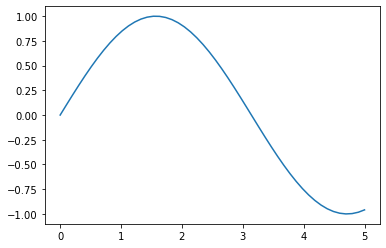

In [43]:
x = np.linspace(0,5,50)
y = np.sin(x)
plt.plot(x,y)

This looks pretty good but lets play with it a bit.   First lets add another line

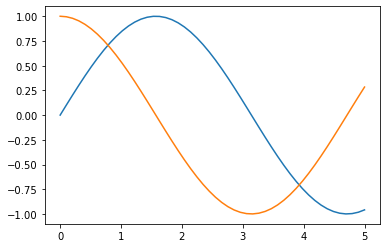

In [44]:
x = np.linspace(0,5,50)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1)
plt.plot(x,y2) # to add another line just call plot again

Not lets add some options for lines:

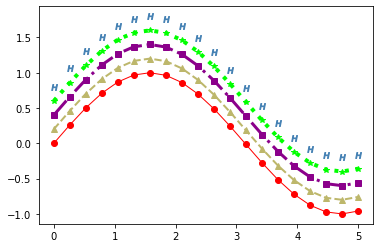

In [45]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x) + 0.2
y3 = np.sin(x) + 0.4
y4 = np.sin(x) + 0.6
y5 = np.sin(x) + 0.8
y6 = np.sin(x) + 1
plt.plot(x,y1,linestyle='-',linewidth=1,color='r',marker=('o'))
plt.plot(x,y2,linestyle='--',linewidth=2,color='#BDB76B',marker=('^'))
plt.plot(x,y3,linestyle='-.',linewidth=3,color=(139/255, 0, 139/255),marker=('s'))
plt.plot(x,y4,linestyle=':',linewidth=4,color='lime',marker=('*'))
plt.plot(x,y5,linestyle=' ',marker=('$H$'),color='steelblue')

Now let's think about the rest of the stuff

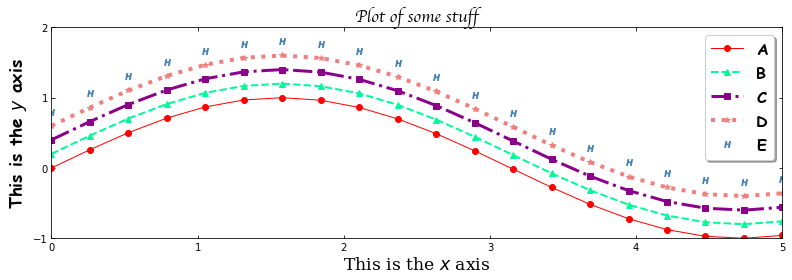

In [46]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x) + 0.2
y3 = np.sin(x) + 0.4
y4 = np.sin(x) + 0.6
y5 = np.sin(x) + 0.8
y6 = np.sin(x) + 1

#aspect ratio
w, h = plt.figaspect(0.36)
plt.figure('Sin plots',figsize=(w,h))

plt.plot(x,y1,linestyle='-',linewidth=1,color='r',marker=('o'))
plt.plot(x,y2,linestyle='--',linewidth=2,color='#00FA9A',marker=('^'))
plt.plot(x,y3,linestyle='-.',linewidth=3,color=(139/255, 0, 139/255),marker=('s'))
plt.plot(x,y4,linestyle=':',linewidth=4,color='lightcoral',marker=('*'))
plt.plot(x,y5,linestyle=' ',marker=('$H$'),color='steelblue')

# Tick location and limits
plt.xticks((0,1,2,3,4,5))
plt.xlim(0,5)
plt.yticks((-1,0,1,2))
plt.ylim(-1,2)

# Make ticks point inwards and also appear top and right
plt.tick_params(direction='in',top=True,right=True)

# Add some labels
plt.title('Plot of some stuff',fontfamily = 'cursive',fontsize = 'xx-large',fontstyle='italic',fontweight = 'light')
plt.ylabel('This is the $y$ axis',fontfamily = 'fantasy',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontfamily = 'serif',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')

# add a legend, annoyingly here you can't use most font commands but have to set it manually and import as 'prop'
# you can also label the lines in the plot diective with: label='name here'
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Comic Sans MS',weight='bold',style='normal', size=16)
plt.legend(('A','B','C','D','E'),prop=font,loc='upper right', shadow=True)

# removed extra white space
plt.tight_layout()

Matplotlib actually has two interfaces for plotting.  The above is the matlab version but you can also use the object oriented interface as below:

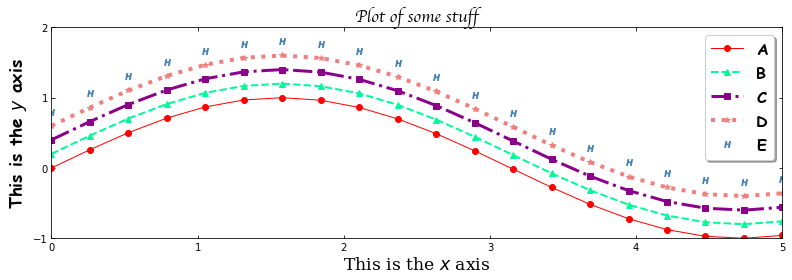

In [47]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x) + 0.2
y3 = np.sin(x) + 0.4
y4 = np.sin(x) + 0.6
y5 = np.sin(x) + 0.8
y6 = np.sin(x) + 1

#aspect ratio
w, h = plt.figaspect(0.36)
fig = plt.figure('Sin plots',figsize=(w,h))
ax = plt.axes()

ax.plot(x,y1,linestyle='-',linewidth=1,color='r',marker=('o'))
ax.plot(x,y2,linestyle='--',linewidth=2,color='#00FA9A',marker=('^'))
ax.plot(x,y3,linestyle='-.',linewidth=3,color=(139/255, 0, 139/255),marker=('s'))
ax.plot(x,y4,linestyle=':',linewidth=4,color='lightcoral',marker=('*'))
ax.plot(x,y5,linestyle=' ',marker=('$H$'),color='steelblue')

# Tick location and limits
ax.set(xticks=(0,1,2,3,4,5),xlim=(0,5),yticks=(-1,0,1,2),ylim=(-1,2))

# Make ticks point inwards and also appear top and right
ax.tick_params(direction='in',top=True,right=True)

# Add some labels
ax.set_title('Plot of some stuff',fontfamily = 'cursive',fontsize = 'xx-large',fontstyle='italic',fontweight = 'light')
ax.set_ylabel('This is the $y$ axis',fontfamily = 'fantasy',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
ax.set_xlabel('This is the $x$ axis',fontfamily = 'serif',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')

# add a legend, annoyingly here you can't use most font commands but have to set it manually and import as 'prop'
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Comic Sans MS',weight='bold',style='normal', size=16)
ax.legend(('A','B','C','D','E'),prop=font,loc='upper right', shadow=True)

# removed extra white space
plt.tight_layout()

It doesn't matter too much which you use but the object orentated interface can be easier for figures with multiple plots on it.  Let's look at doing multiple plots in one figure now.  Here is the simple case for a grid of plots:

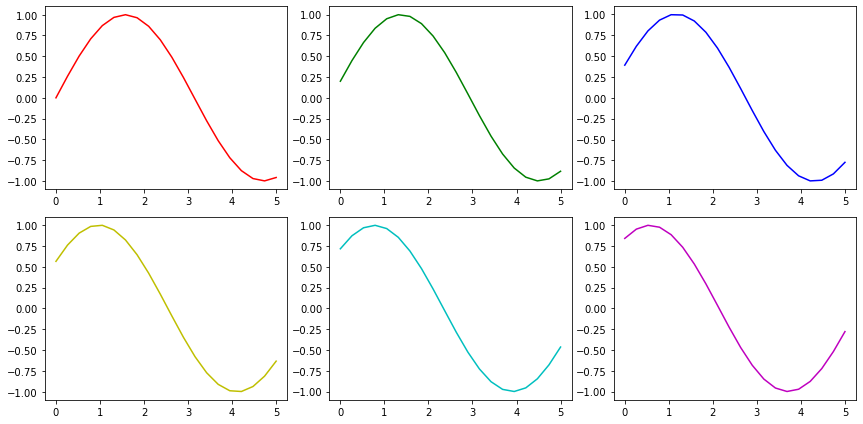

In [48]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x + 0.2)
y3 = np.sin(x + 0.4)
y4 = np.sin(x + 0.6)
y5 = np.sin(x + 0.8)
y6 = np.sin(x + 1)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(12,6))

# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
plt.plot(x,y1,color='r')
plt.subplot(232)
plt.plot(x,y2,color='g')
plt.subplot(233)
plt.plot(x,y3,color='b')
plt.subplot(234)
plt.plot(x,y4,color='y')
plt.subplot(235)
plt.plot(x,y5,color='c')
plt.subplot(236)
plt.plot(x,y6,color='m')
# removed extra white space
plt.tight_layout()

In object oriented mode this is a little easier:

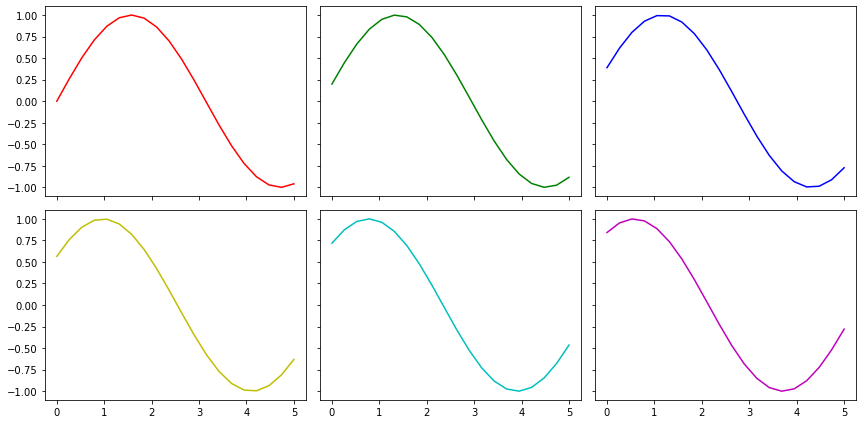

In [49]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x + 0.2)
y3 = np.sin(x + 0.4)
y4 = np.sin(x + 0.6)
y5 = np.sin(x + 0.8)
y6 = np.sin(x + 1)

# now we decide the actual figure and share x and y axes
fig, ax = plt.subplots(2,3,figsize=(12,6), sharex=True,sharey=True)

# Now each plot has a location defined by the numpy array ax
ax[0,0].plot(x,y1,color='r')
ax[0,1].plot(x,y2,color='g')
ax[0,2].plot(x,y3,color='b')
ax[1,0].plot(x,y4,color='y')
ax[1,1].plot(x,y5,color='c')
ax[1,2].plot(x,y6,color='m')
# removed extra white space
fig.tight_layout()

We can make multiple plots of different sizes by creating 2 sets of subplots which are multiples of each other using the same method (with matlab style interface)

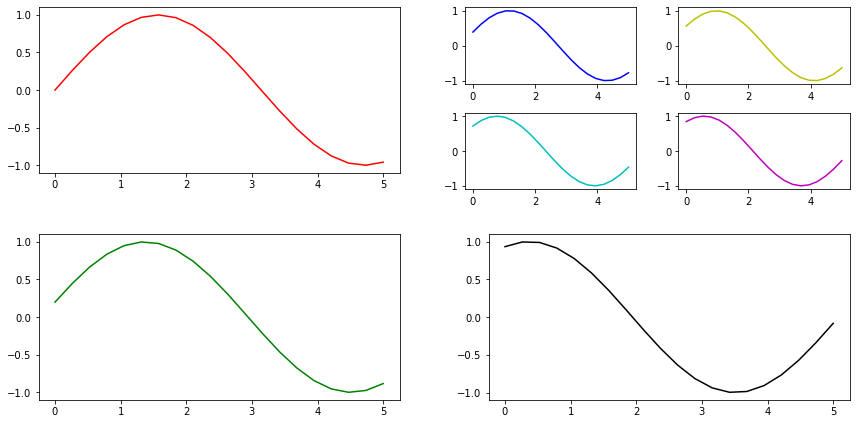

In [50]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x + 0.2)
y3 = np.sin(x + 0.4)
y4 = np.sin(x + 0.6)
y5 = np.sin(x + 0.8)
y6 = np.sin(x + 1.0)
y7 = np.sin(x + 1.2)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(12,6))

# create subplots now we have created a 2x2 grid and a 4x4 grid and fitted them together
plt.subplot(221)
plt.plot(x,y1,color='r')
plt.subplot(223)
plt.plot(x,y2,color='g')
plt.subplot(224)
plt.plot(x,y7,color='k')

plt.subplot(443)
plt.plot(x,y3,color='b')
plt.subplot(444)
plt.plot(x,y4,color='y')
plt.subplot(447)
plt.plot(x,y5,color='c')
plt.subplot(448)
plt.plot(x,y6,color='m')

# removed extra white space
plt.tight_layout()

But here it is better to use `gridspec`, which also gives better layout:

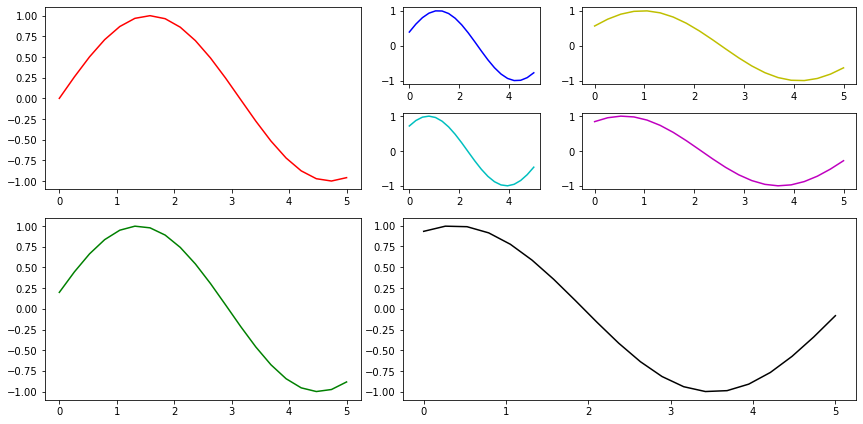

In [51]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x + 0.2)
y3 = np.sin(x + 0.4)
y4 = np.sin(x + 0.6)
y5 = np.sin(x + 0.8)
y6 = np.sin(x + 1.0)
y7 = np.sin(x + 1.2)

# create figure
fig = plt.figure(figsize=(12,6))
# import gridspec and create a 4x4 grid
# we can also specifc the ratios of the sections of the grid relative to each other
import matplotlib.gridspec as gs
grid = gs.GridSpec(4, 4,width_ratios=[1,1,1,2],height_ratios=[1,1,1,1])

# Create axis objects for each plot
ax1 = plt.subplot(grid[0:2,0:2])
ax2 = plt.subplot(grid[2:4,0:2])
ax3 = plt.subplot(grid[2:4,2:4])
ax4 = plt.subplot(grid[0,2])
ax5 = plt.subplot(grid[0,3])
ax6 = plt.subplot(grid[1,2])
ax7 = plt.subplot(grid[1,3])

# create subplots
ax1.plot(x,y1,color='r')
ax2.plot(x,y2,color='g')
ax3.plot(x,y7,color='k')

ax4.plot(x,y3,color='b')
ax5.plot(x,y4,color='y')
ax6.plot(x,y5,color='c')
ax7.plot(x,y6,color='m')

# removed extra white space
plt.tight_layout()

If we go back to the previous example of 6 plots in a regular grid we can do it with `gridspec` which gives us more control:

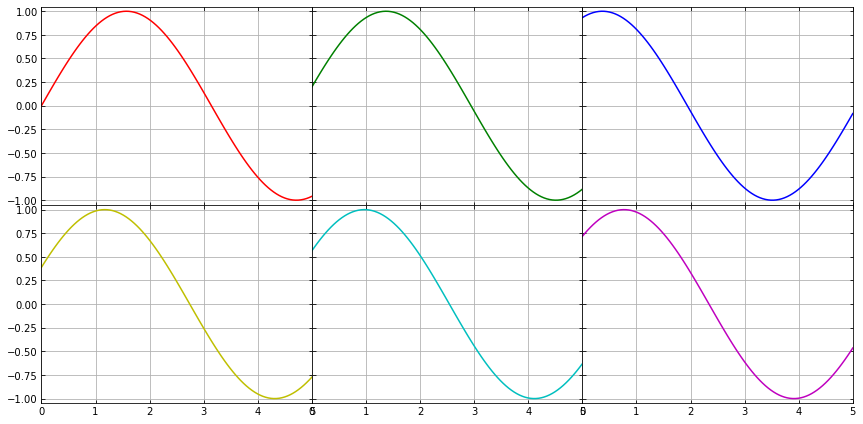

In [52]:
x = np.linspace(0,5,100)
y1 = np.sin(x)
y2 = np.sin(x + 0.2)
y3 = np.sin(x + 0.4)
y4 = np.sin(x + 0.6)
y5 = np.sin(x + 0.8)
y6 = np.sin(x + 1.0)
y7 = np.sin(x + 1.2)

# create figure
fig = plt.figure(figsize=(12,6))
# import gridspec and create a 4x4 grid
# This time lets join them up into one
import matplotlib.gridspec as gs
grid = gs.GridSpec(2,3,wspace=0,hspace=0)

# Create axis objects for each plot
ax1 = plt.subplot(grid[0,0])
ax2 = plt.subplot(grid[0,1])
ax3 = plt.subplot(grid[0,2])
ax4 = plt.subplot(grid[1,0])
ax5 = plt.subplot(grid[1,1])
ax6 = plt.subplot(grid[1,2])

# create subplots for all 6
ax1.plot(x,y1,color='r')
ax2.plot(x,y2,color='g')
ax3.plot(x,y7,color='b')
ax4.plot(x,y3,color='y')
ax5.plot(x,y4,color='c')
ax6.plot(x,y5,color='m')

# Turn the ticks inward
ax1.tick_params(direction='in',top=True,right=True)
ax2.tick_params(direction='in',top=True,right=True)
ax3.tick_params(direction='in',top=True,right=True)
ax4.tick_params(direction='in',top=True,right=True)
ax5.tick_params(direction='in',top=True,right=True)
ax6.tick_params(direction='in',top=True,right=True)

# set the limits to be the same so they line up perfectly
ax1.set(xlim=(0,5),ylim=(-1.05,1.05))
ax2.set(xlim=(0,5),ylim=(-1.05,1.05))
ax3.set(xlim=(0,5),ylim=(-1.05,1.05))
ax4.set(xlim=(0,5),ylim=(-1.05,1.05))
ax5.set(xlim=(0,5),ylim=(-1.05,1.05))
ax6.set(xlim=(0,5),ylim=(-1.05,1.05))

# Add grids
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax5.grid(True)
ax6.grid(True)

# remove tick labels for interior axes
ax1.xaxis.set(ticklabels=[])
ax2.xaxis.set(ticklabels=[])
ax3.xaxis.set(ticklabels=[])

ax2.yaxis.set(ticklabels=[])
ax3.yaxis.set(ticklabels=[])
ax5.yaxis.set(ticklabels=[])
ax6.yaxis.set(ticklabels=[])

# removed extra white space (you should alway do this as it always makes the plot better)
plt.tight_layout()

### Types of plots

Thats the basic type of plot but there are many others, here is a selection:

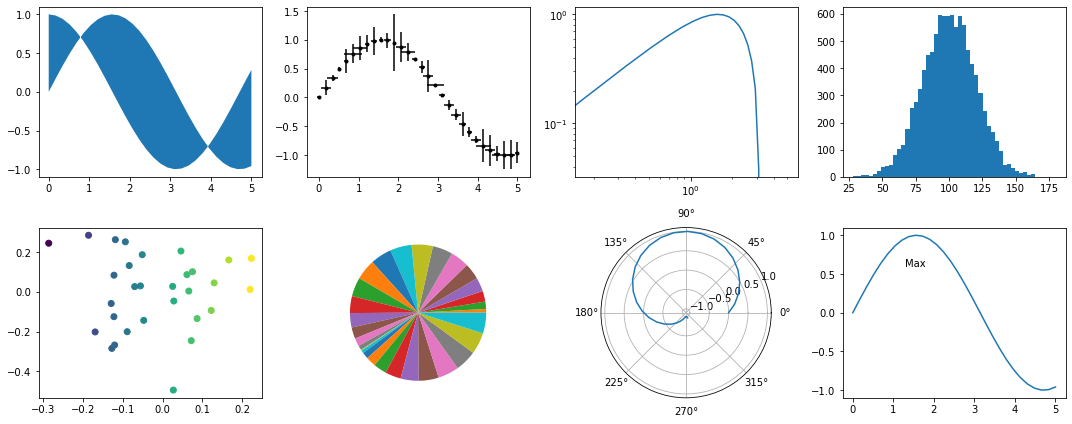

In [53]:
x = np.linspace(0,5,30)
y1 = np.sin(x)
y2 = np.cos(x)
e1 = 0.1*np.random.randn(len(x))
e2 = 0.2*np.random.randn(len(x))
h1 = 100 + 20*np.random.randn(10000)
y5 = np.sin(x + 0.8)
y6 = np.sin(x + 1.0)
y7 = np.sin(x + 1.2)

# create figure
fig = plt.figure(figsize=(15,6))
# import gridspec and create a 4x4 grid
# This time lets join them up into one
import matplotlib.gridspec as gs
grid = gs.GridSpec(2,4)

# Create axis objects for each plot
ax1 = plt.subplot(grid[0,0])
ax2 = plt.subplot(grid[0,1])
ax3 = plt.subplot(grid[0,2])
ax4 = plt.subplot(grid[0,3])
ax5 = plt.subplot(grid[1,0])
ax6 = plt.subplot(grid[1,1])
ax7 = plt.subplot(grid[1,2], projection='polar')
ax8 = plt.subplot(grid[1,3])

ax1.fill_between(x,y1,y2)
ax2.errorbar(x,y1,fmt='.k',xerr=e1,yerr=e2,linestyle=' ')
ax3.loglog(x,y1)
ax4.hist(h1,50)
ax5.scatter(e1,e2,c=e1)
ax6.pie(np.abs(y1))
ax7.plot(x,y1)
ax8.plot(x,y1)

ax8.text(1.3,0.6,'Max')

# removed extra white space (you should alway do this as it always makes the plot better)
plt.tight_layout()

You can also change the style of the plots:

In [54]:
x = np.linspace(0,5,100)
y1 = np.sin(x)
y2 = np.sin(x + 0.2)
y3 = np.sin(x + 0.4)
y4 = np.sin(x + 0.6)
y5 = np.sin(x + 0.8)
y6 = np.sin(x + 1.0)
y7 = np.sin(x + 1.2)

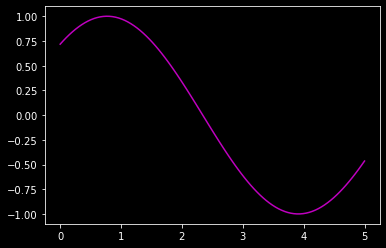

In [55]:
with plt.style.context(('dark_background')):
    plt.plot(x,y5,color='m')

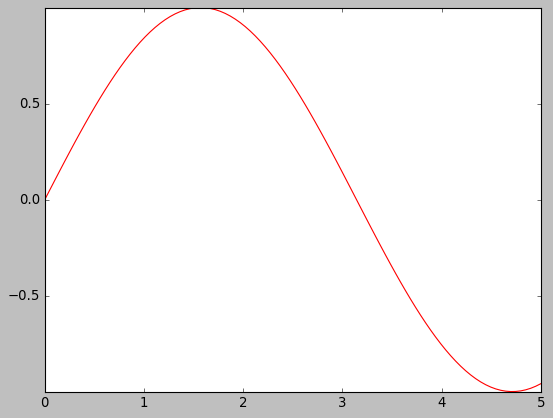

In [56]:
with plt.style.context(('classic')):
    plt.plot(x,y1,color='r')

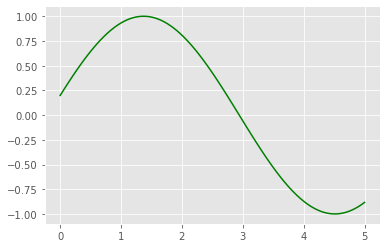

In [57]:
with plt.style.context(('ggplot')):
    plt.plot(x,y2,color='g')

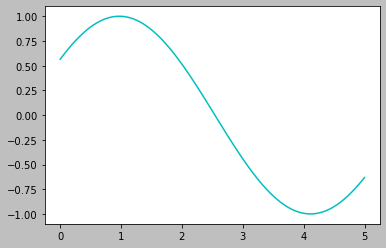

In [58]:
with plt.style.context(('grayscale')):
    plt.plot(x,y4,color='c')

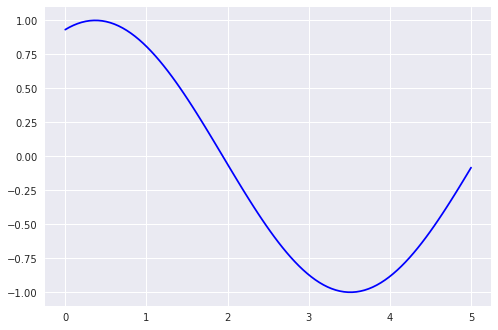

In [59]:
with plt.style.context(('seaborn')):
    plt.plot(x,y7,color='b')

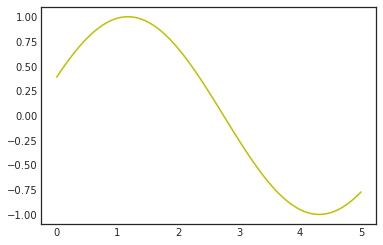

In [60]:
with plt.style.context(('seaborn-white')):
    plt.plot(x,y3,color='y')

The last two are included from the `seaborn` package which sits of the the top of matplotlib and is good for stats plots (https://seaborn.pydata.org).

### Examples

3. Plot a Rainbow, ie:
![](Plots/Rainbow.png)
4. Generate a 2d multivariate data set with mean [1,2] and covariance [[1,2],[2,5]] then plot it like this:
![](Plots/Multivar.png)



### 3D plots

There are also a limited number of 3D plots you can do with matplotlib (which was originally designed primarily for 2D plots). Here are the main options

In [61]:
import numpy as np
import matplotlib.pyplot as plt

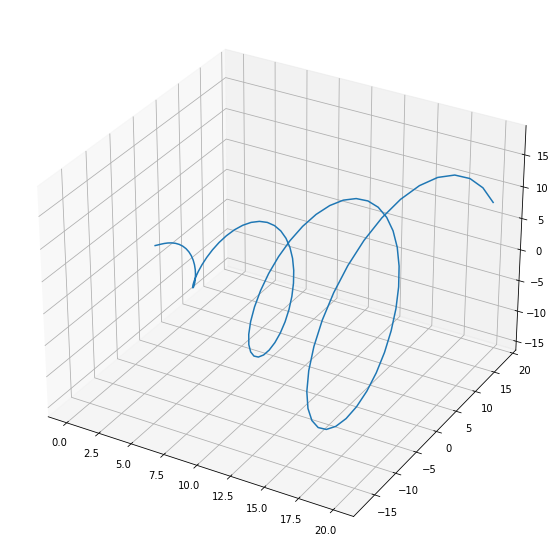

In [62]:
from mpl_toolkits import mplot3d

x = np.linspace(0,20,100)
y = x*np.sin(x)
z = x*np.cos(x)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot3D(x,y,z)



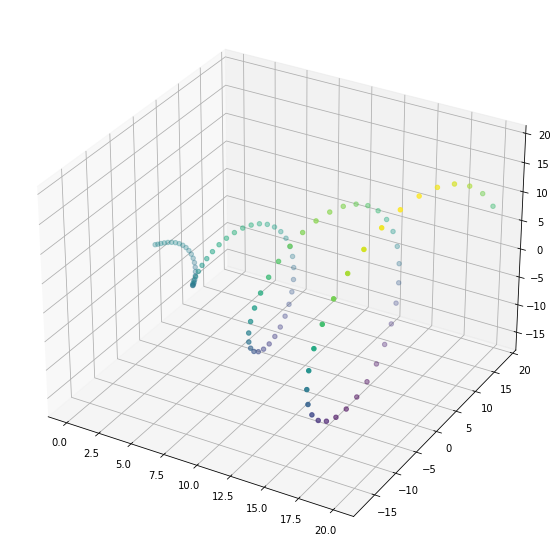

In [63]:
x = np.linspace(0,20,100)
y = x*np.sin(x)
z = x*np.cos(x)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(x,y,z,c=z)

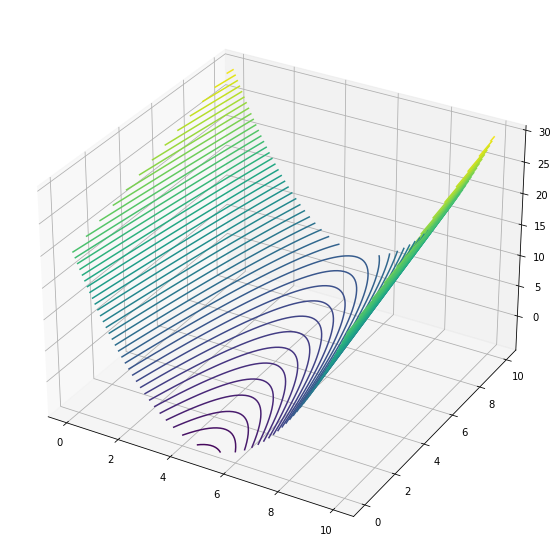

In [64]:
x = np.linspace(0,10,100)
y = x
X,Y=np.meshgrid(x,y)

Z = (X-5)**2 + (Y-5)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

ax.contour3D(X,Y,Z,50)


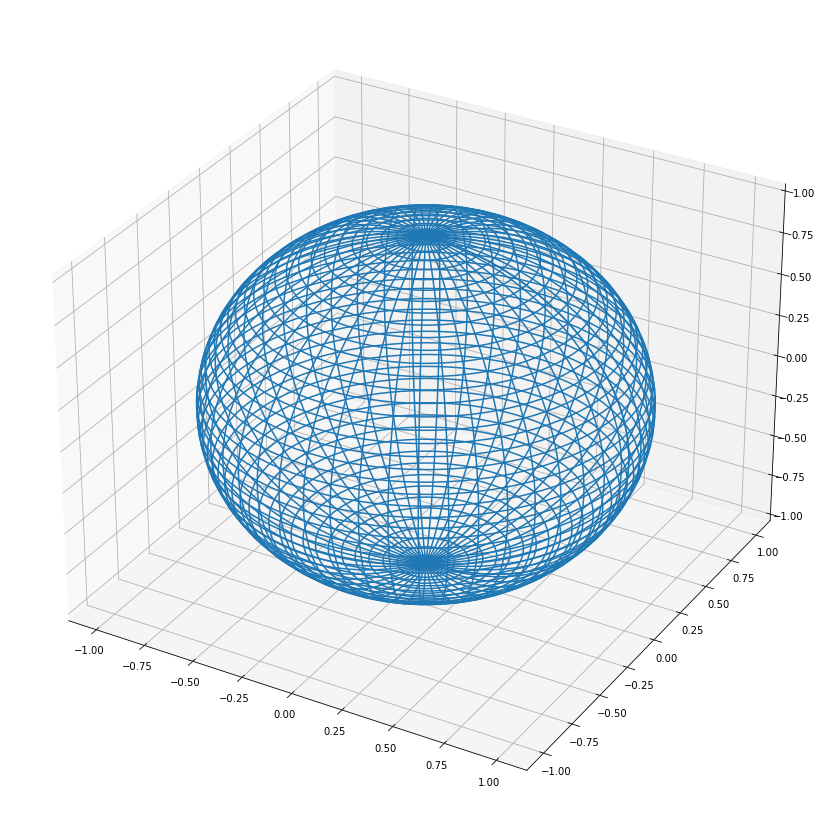

In [65]:
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.plot_wireframe(x, y, z)

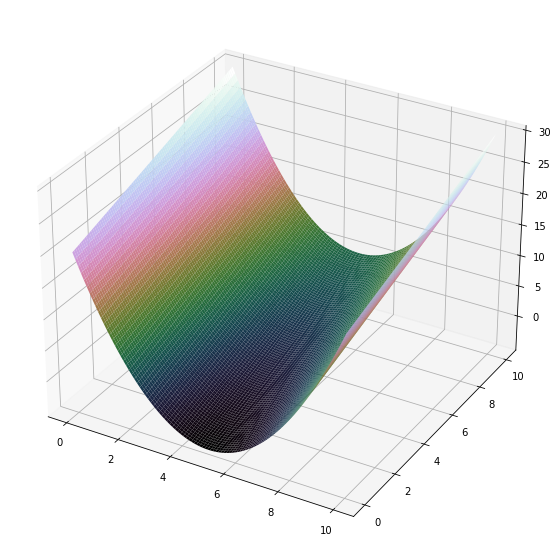

In [66]:
x = np.linspace(0,10,100)
y = x
X,Y=np.meshgrid(x,y)

Z = (X-5)**2 + (Y-5)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='cubehelix')

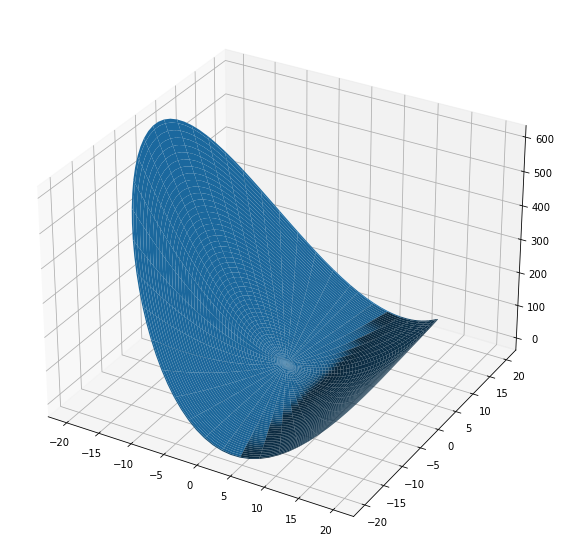

In [67]:
x = np.linspace(0,20,100)
y = np.linspace(0,2*np.pi,100)

r,t=np.meshgrid(x,y)

X = r * np.sin(t)
Y = r * np.cos(t)

Z = (X-5)**2 + (Y-5)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,Z)

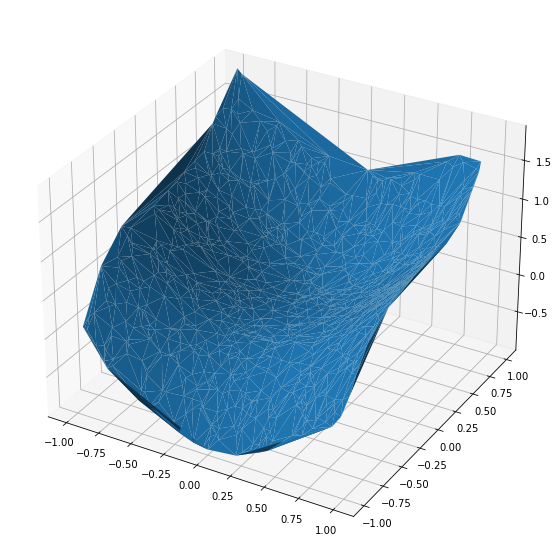

In [68]:
x = 2*np.random.random(1000)-1e0
y = 2*np.random.random(1000)-1e0

z = x**2 + y**3

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

ax.plot_trisurf(x,y,z)

These are OK for basic stuff but are a bit limited, say coloring them based on anything but z value.  To get more advanced there is `mayavi` with the warning that is is a real pain to install due to its dependencies.  The 'full noise' tool is `vtk` again a massive pain to install (you'll need to set up a new enviroment with python 2.7 then switch to that to use them).  Paraview also but not python.  https://www.paraview.org/Wiki/The_ParaView_Tutorial 